In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
# from astropy.cosmology import Planck18 as P18

# Primordial Power Spectra Parameterizations

In [4]:
k = np.logspace(-4, 2, 1000)

k_pivot = 0.05
A_s = 2.105e-9
n_s = 0.9665

k1 = 0.002
k2 = 0.1
prr1 = 3.105e-9
prr2 = 2.105e-9

n_iso = np.log(prr2/prr1)/np.log(k2/k1)+1.
A_iso = prr1*np.exp((n_iso-1.)*np.log(k_pivot/k1))

In [5]:
def adia_Pk(k):
    return (2*np.pi**2/k**3)*A_s*(k/k_pivot)**(n_s-1)

def one_scale_iso_Pk(k):
    return (2*np.pi**2/k**3)*A_iso*(k/k_pivot)**(n_iso-1)

def two_scales_iso_Pk(k):
    Pk = (2*np.pi**2/k**3)*np.exp( (np.log(k)-np.log(k2))*np.log(prr1)/(np.log(k1)-np.log(k2)) + (np.log(k)-np.log(k1))*np.log(prr2)/(np.log(k2)-np.log(k1)) )
    return Pk

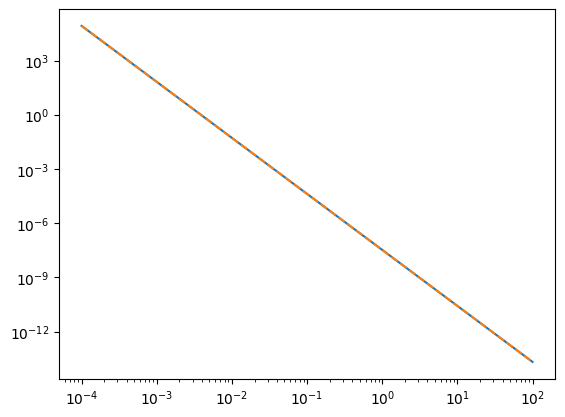

In [7]:
plt.loglog(k, one_scale_iso_Pk(k))
plt.loglog(k, two_scales_iso_Pk(k),ls='--')


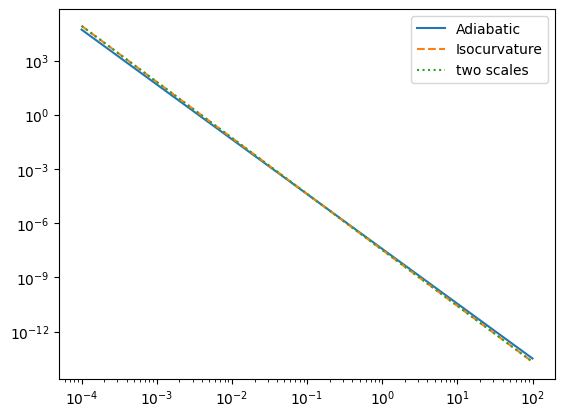

In [8]:
plt.loglog(k, adia_Pk(k), label='Adiabatic')
plt.loglog(k, one_scale_iso_Pk(k), label='Isocurvature', ls='--')
plt.loglog(k, two_scales_iso_Pk(k), label='two scales', ls=':')
plt.legend()

# Isocurvature Modes

In [47]:
# set cosmo to Planck 2018 best fit LCDM
adi_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    'ic': 'ad'
    }

cdi_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    # isocurvature parameters
    'ic': 'ad cdi',
    'Pk_ini_type': 'analytic_Pk',
    'k_pivot': 0.05,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'alpha_s': 0.0,
    'f_cdi': 0.2,
    'n_cdi': 1.0,
    'alpha_cdi':0.0}

bi_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    # isocurvature parameters
    'ic': 'ad bi',
    'Pk_ini_type': 'analytic_Pk',
    'k_pivot': 0.05,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'alpha_s': 0.0,
    'f_bi': 0.5,
    'n_bi': 1.0,
    'alpha_bi':0.0}

nid_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    # isocurvature parameters
    'ic': 'ad nid',
    'Pk_ini_type': 'analytic_Pk',
    'k_pivot': 0.05,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'alpha_s': 0.0,
    'f_nid': 0.3,
    'n_nid': 1.0,
    'alpha_nid':0.0}

niv_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    # isocurvature parameters
    'ic': 'ad niv',
    'Pk_ini_type': 'analytic_Pk',
    'k_pivot': 0.05,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'alpha_s': 0.0,
    'f_niv': 0.1,
    'n_niv': 1.0,
    'alpha_niv':0.0}

In [48]:
M_adi = Class()
M_adi.set(adi_params)
M_adi.compute()

M_cdi = Class()
M_cdi.set(cdi_params)
M_cdi.compute()

M_bi = Class()
M_bi.set(bi_params)
M_bi.compute()

M_nid = Class()
M_nid.set(nid_params)
M_nid.compute()

M_niv = Class()
M_niv.set(niv_params)
M_niv.compute()

In [49]:
# ADIABATIC
cls_adi = M_adi.raw_cl(2500)

ell_adi = cls_adi['ell'][2:]
ell_fac = (M_adi.T_cmb()*1e6)**2*(ell_adi*(ell_adi+1))/(2*np.pi)
ttCl_adi = cls_adi['tt'][2:]

# CDM ISOCURVATURE
cls_cdi = M_cdi.raw_cl(2500)

ell_cdi = cls_cdi['ell'][2:]
ttCl_cdi = cls_cdi['tt'][2:]

# BARYON ISOCURVATURE
cls_bi = M_bi.raw_cl(2500)

ell_bi = cls_bi['ell'][2:]
ttCl_bi = cls_bi['tt'][2:]

# NEUTRINO DENSITY ISOCURVATURE
cls_nid = M_nid.raw_cl(2500)

ell_nid = cls_nid['ell'][2:]
ttCl_nid = cls_nid['tt'][2:]

# NEUTRINO VELOCITY ISOCURVATURE
cls_niv = M_niv.raw_cl(2500)

ell_niv = cls_niv['ell'][2:]
ttCl_niv = cls_niv['tt'][2:]

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell^{TT}/(2\\pi)$')

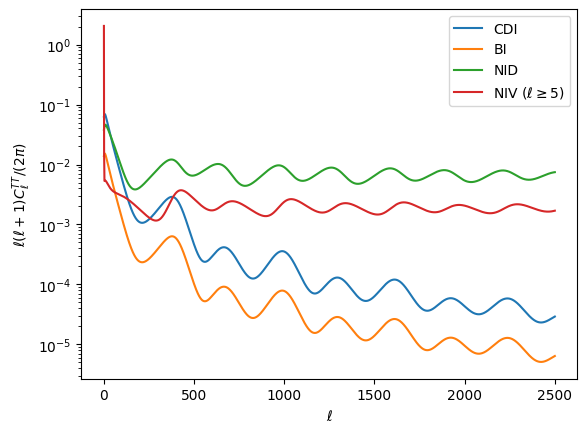

In [50]:
plt.semilogy(ell_adi, ttCl_cdi/ttCl_adi-1, label='CDI')
plt.semilogy(ell_adi, ttCl_bi/ttCl_adi-1, label='BI')
plt.semilogy(ell_adi, ttCl_nid/ttCl_adi-1, label='NID')
plt.semilogy(ell_adi, ttCl_niv/ttCl_adi-1, label='NIV ($\ell\geq 5$)')
plt.legend()

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)$')

In [39]:
adi_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    'ic': 'ad'
    }

# have 20% of the primordial power spectrum in the cdi mode
cdi_iso_params = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    # isocurvature parameters
    'ic': 'ad cdi',
    'Pk_ini_type': 'analytic_Pk',
    'k_pivot': 0.05,
    'A_s': 2.105e-9,
    'n_s': 0.9665, 
    'alpha_s': 0.0,
    'f_cdi': 0.2,
    'n_cdi': 1.0,
    'alpha_cdi':0.0}

cdi_iso_params_two_scales = {
    'omega_b': 0.02237,
    'omega_cdm': 0.11933,
    'h': 0.6766,
    'tau_reio': 0.0561,
    'P_k_max_1/Mpc':3.0,
    'T_cmb': 2.7255,
    'output': 'tCl lCl pCl mPk',
    'l_max_scalars': 2500,
    'lensing': 'yes',
    # isocurvature parameters
    'ic': 'ad cdi',
    'Pk_ini_type': 'two_scales',
    'k1': 0.002,
    'k2': 0.1,
    'P_{RR}^1': 2.105e-9,
    'P_{RR}^2': 2.105e-9,
    'P_{II}^1': 1e-13, 
    'P_{II}^2': 1e-13, 
    'P_{RI}^1': 1e-15,
    '|P_{RI}^2|': 1e-15,
    }

In [40]:
def two_scales_Pk(k,p1,p2,k1,k2):
    Pk = (2*np.pi**2/k**3)*np.exp( (np.log(k)-np.log(k2))*np.log(p1)/(np.log(k1)-np.log(k2)) + (np.log(k)-np.log(k1))*np.log(p2)/(np.log(k2)-np.log(k1)) )
    return Pk

def beta_iso(k):
    '''
    Compute the primordial isocurvature fraction. 
    beta_iso = P_{II}/(P_{RR} + P_{II})
    '''
    k1 = cdi_iso_params_two_scales['k1']
    k2 = cdi_iso_params_two_scales['k2']
    prr = two_scales_Pk(k,cdi_iso_params_two_scales['P_{RR}^1'],cdi_iso_params_two_scales['P_{RR}^2'],k1,k2)
    pii = two_scales_Pk(k,cdi_iso_params_two_scales['P_{II}^1'],cdi_iso_params_two_scales['P_{II}^2'],k1,k2)

    beta_iso = pii/(prr+pii)
    return beta_iso

def correlation_delta(k):
    '''
    Compute the beta iso parameter. 
    cos \Delta =  P_{RI}/(P_{RR} * P_{II})^{1/2}
    '''
    k1 = cdi_iso_params_two_scales['k1']
    k2 = cdi_iso_params_two_scales['k2']
    prr = two_scales_Pk(k,cdi_iso_params_two_scales['P_{RR}^1'],cdi_iso_params_two_scales['P_{RR}^2'],k1,k2)
    pii = two_scales_Pk(k,cdi_iso_params_two_scales['P_{II}^1'],cdi_iso_params_two_scales['P_{II}^2'],k1,k2)
    pri = two_scales_Pk(k,cdi_iso_params_two_scales['P_{RI}^1'],cdi_iso_params_two_scales['|P_{RI}^2|'],k1,k2)
    
    delta = pri/(prr*pii)**0.5
    return delta

In [44]:
M_adi = Class()
M_adi.set(adi_params)
M_adi.compute()

M_cdi = Class()
M_cdi.set(cdi_iso_params)
M_cdi.compute()

M_cdi_2 = Class()
M_cdi_2.set(cdi_iso_params_two_scales)
M_cdi_2.compute()

In [45]:
# ADIABATIC
cls_adi = M_adi.raw_cl(2500)

ell_adi = cls_adi['ell'][2:]
ell_fac = (M_adi.T_cmb()*1e6)**2*(ell_adi*(ell_adi+1))/(2*np.pi) # conversion factor to muK^2 and l(l+1)/(2pi)
ttCl_adi = cls_adi['tt'][2:]

# CDM ISOCURVATURE - ONE SCALE
cls_cdi = M_cdi.raw_cl(2500)

ell_cdi = cls_cdi['ell'][2:]
ttCl_cdi = cls_cdi['tt'][2:]

# CDI ISOCURVATURE - TWO SCALES
cls_cdi_2 = M_cdi_2.raw_cl(2500)

ell_cdi_2 = cls_cdi_2['ell'][2:]
ttCl_cdi_2 = cls_cdi_2['tt'][2:]

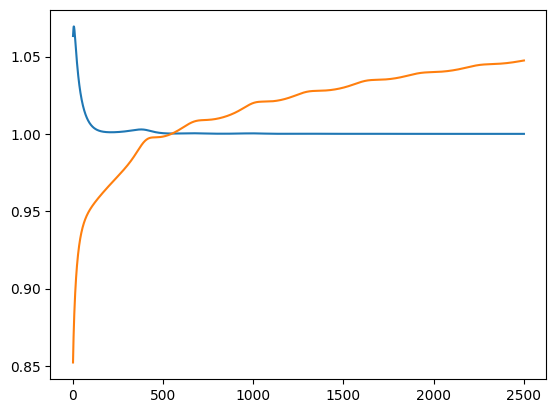

In [46]:
plt.plot(ell_adi, ttCl_cdi/ttCl_adi, label='CDI - one scale')
plt.plot(ell_cdi, ttCl_cdi_2/ttCl_adi, label='CDI - two scales')